## Importing libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('Matplotlib'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas: 1.1.4
Numpy: 1.18.5
sklearn: 0.22.2.post1
Matplotlib
Keras: 2.4.3


In [2]:
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Read the dataset
cleveland = pd.read_csv("heart.csv")

In [4]:
# printing the shape of dataframe
print('Shape of the dataframe: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of the dataframe: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [5]:
# print some of the data points in the end
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [6]:
# Removing missing data
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [7]:
data = data.dropna(axis = 0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [8]:
# Now print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

# Convert all the data to numeric values
data = data.apply(pd.to_numeric)
data.dtypes

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


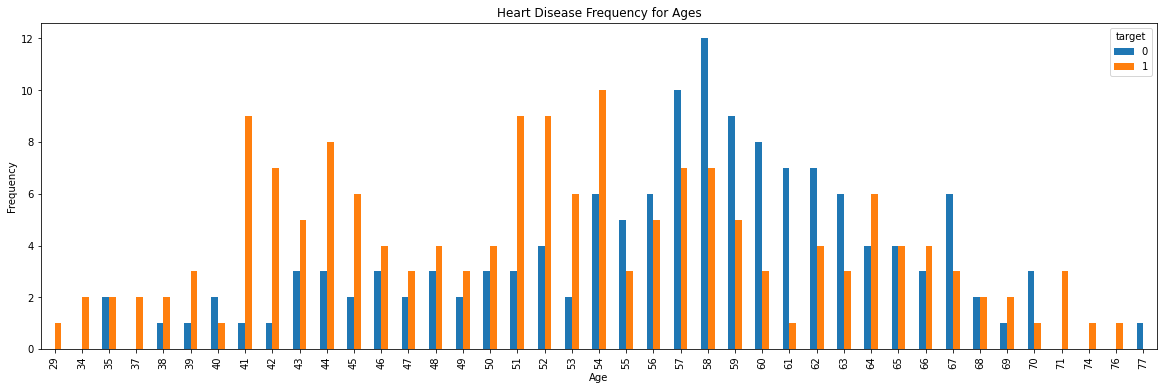

In [10]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

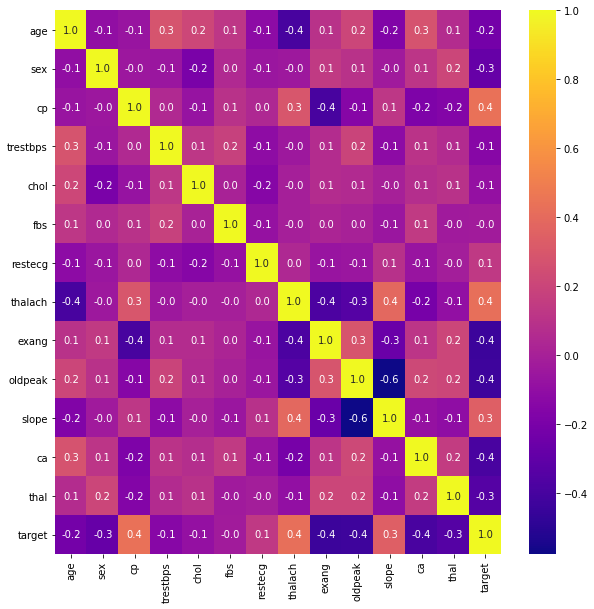

In [11]:
# Drawing heatmap for the correlation between attributes
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f', cmap = 'plasma')
plt.show()

## Plotting age vs Thalach

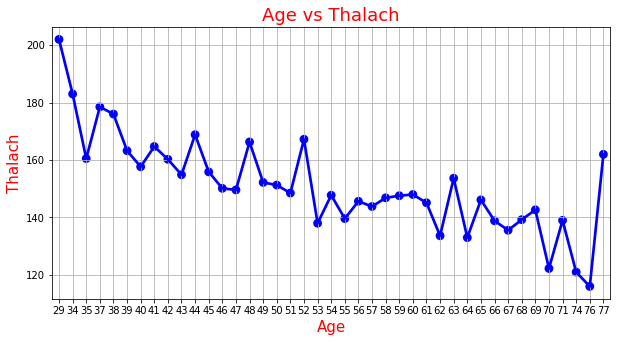

In [12]:
age_unique = sorted(data.age.unique())
age_thalach_values = data.groupby('age')['thalach'].count().values
mean_thalach = []
for i, age in enumerate(age_unique):
  mean_thalach.append(sum(data[data['age'] == age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x = age_unique, y = mean_thalach, color = 'blue', alpha = 0.8)
plt.xlabel('Age', fontsize = 15, color = 'red')
plt.ylabel('Thalach', fontsize = 15, color = 'red')
plt.title('Age vs Thalach', fontsize = 18, color = 'red')
plt.grid()
plt.show()

## Creation of Training and testing datasets

#### Dividing the dataset in 70% for training and 30% for testing


In [13]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [14]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [15]:
# Normalizing the database
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

In [16]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [17]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y, 
                                                                    random_state = 42, test_size = 0.3)

In [18]:
# Conversion of data into categorical labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes = None)
Y_test = to_categorical(y_test, num_classes = None)
print(Y_train.shape)
print(Y_train[:10])

(212, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [19]:
X_train[0]

array([ 2.38595135, -1.46841752,  1.00257707,  0.47839125, -0.95205107,
       -0.41763453,  2.80375634, -1.47139438, -0.69663055,  0.05210339,
       -0.64911323, -0.71442887, -0.51292188])

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 0s 15ms/step - loss: 0.6825 - accuracy: 0.5425 - val_loss: 0.6666 - val_accuracy: 0.6813
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7311 - val_loss: 0.6352 - val_accuracy: 0.7912
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7217 - val_loss: 0.6040 - val_accuracy: 0.7802
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7500 - val_loss: 0.5706 - val_accuracy: 0.7802
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7972 - val_loss: 0.5441 - val_accuracy: 0.8022
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8396 - val_loss: 0.5246 - val_accuracy: 0.8022
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8443 - val_loss: 0.5129 - val_accuracy: 0.8022
Epoch 8/50
22/22 [=

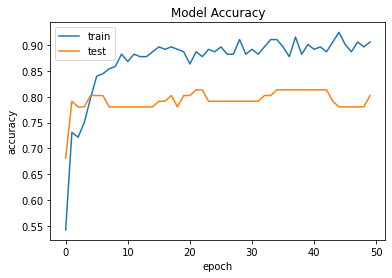

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

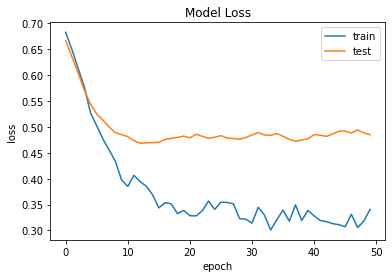

In [23]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [24]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.8022
Accuracy: 80.22


In [25]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
for i in range(0,15):
  print("{}. Prediction => {}, Actual => [{}]".format(i,predictions[i],y[i]))

0. Prediction => 1, Actual => [1]
1. Prediction => 1, Actual => [1]
2. Prediction => 0, Actual => [1]
3. Prediction => 0, Actual => [1]
4. Prediction => 0, Actual => [1]
5. Prediction => 0, Actual => [1]
6. Prediction => 1, Actual => [1]
7. Prediction => 1, Actual => [1]
8. Prediction => 1, Actual => [1]
9. Prediction => 0, Actual => [1]
10. Prediction => 0, Actual => [1]
11. Prediction => 1, Actual => [1]
12. Prediction => 1, Actual => [1]
13. Prediction => 1, Actual => [1]
14. Prediction => 1, Actual => [1]
